In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [2]:
df = pd.read_csv("test_data.dat",sep=',')

In [3]:
dif1 = (df["p"]-df["mu1"]).abs()
dif2 = (df["p"]-df["mu2"]).abs()

In [4]:
df_close1 = df.where(dif1 <= dif2)
df_close2 = df.where(dif1 > dif2)

In [12]:
df_close_score1 = (df_close1["p"]-df_close1["mu1"])/df_close1["sig1"]
df_close_score2 = (df_close2["p"]-df_close2["mu2"])/df_close2["sig2"]

In [13]:
df_close_score1 = df_close_score1.dropna(axis=0,how='all')
df_close_score2 = df_close_score2.dropna(axis=0,how='all')

In [14]:
df_comp = pd.concat([df_close_score1,df_close_score2],ignore_index=True)

In [15]:
bins = np.arange(-6.0,6.0,0.1)

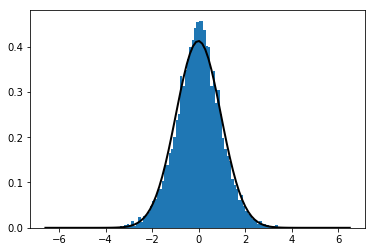

In [16]:
plt.hist(df_comp,bins=bins,normed=True)
mu, std = norm.fit(df_comp)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [17]:
np.mean(df_comp)

-0.015718762490881836

In [18]:
np.sqrt(np.var(df_comp))

0.96733372796806261